In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings

In [115]:
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('cancer_reg.csv', encoding='latin-1')
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

#We can see that our Geography and binnedInc columns are objects, we need to deal with it during data processing                             

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

# We can see basic informations mean, std, our quantiles, data distibution,

In [118]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

# So I have three columns with null values

In [119]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


# We can clearly see your outliers, it is visible in Death Rate around 350 and little above 50

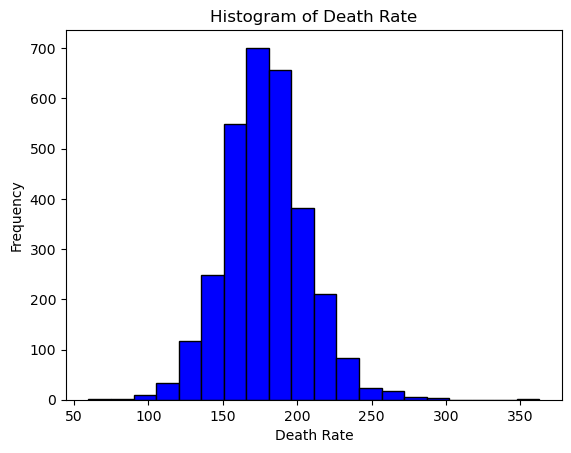

In [120]:
plt.hist(df['TARGET_deathRate'], bins = 20, color = 'blue', edgecolor = 'black')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Death Rate')
plt.show()

# We can see your quantile number_1, median and quanile_number_3, I have also upper and lowe fence, We can clearly see our outliers above our fences

In [121]:
import plotly.graph_objects as go

fig  = go.Figure(data = [go.Box(y = df['TARGET_deathRate'], boxpoints = 'outliers', jitter = 0.3, pointpos = -1.8)])
fig.update_layout(
    title = 'Boxplot of Death Rate',
    yaxis_title = 'Death Rate',
    width = 700,
    height = 500
)
fig.show()

Mean of avgAnnCount:  606.3385437820807
Standard Deviation of avgAnnCount:  1416.3562232267052


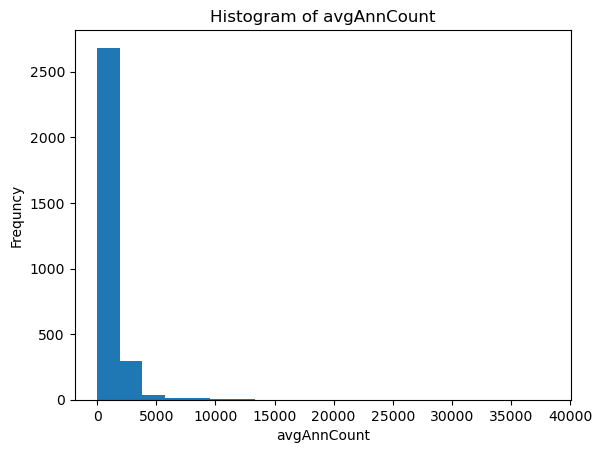

In [122]:
avg_ann_count_mean = df['avgAnnCount'].mean()
avg_ann_count_std = df['avgAnnCount'].std()
print('Mean of avgAnnCount: ', avg_ann_count_mean)
print('Standard Deviation of avgAnnCount: ', avg_ann_count_std)

plt.hist(df['avgAnnCount'], bins = 20)
plt.xlabel('avgAnnCount')
plt.ylabel('Frequncy')
plt.title('Histogram of avgAnnCount')
plt.show()

# I can see that most of my data is distributed around 0 and 5000, I have also some outliers above 10 000

In [123]:
fig = go.Figure(data = [go.Box(y = df['avgAnnCount'], boxpoints = 'outliers', jitter = 0.3, pointpos = -1.8)])
fig.update_layout(
    title = 'Boxplot of avgAnnCount',
    yaxis_title = 'Death Rate',
    width = 700,
    height = 500
)
fig.show()

# Here I can see that outliers are placed above upper fence which is 1177, most of the data stay below 10k

In [124]:
corr = df['avgAnnCount'].corr(df['TARGET_deathRate'])
print('Correlation between avgAnnCount and TARGET_deathRate: ', corr)

Correlation between avgAnnCount and TARGET_deathRate:  -0.14353161968868802


# The correlation is negative, its - 0.1435, so it means that if one increases other decreases, linear relationship is on negative direction in -0.14

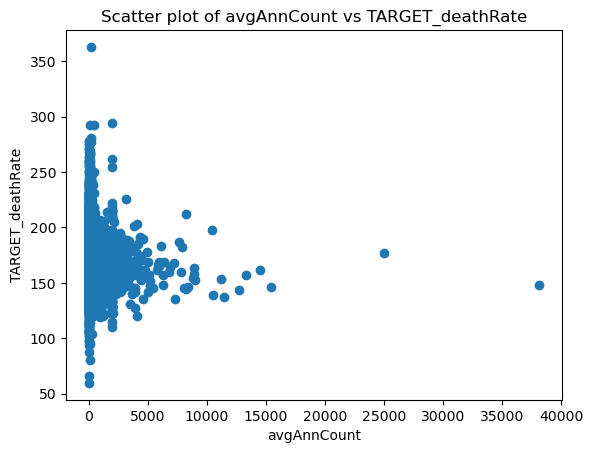

In [125]:
plt.scatter(df['avgAnnCount'], df['TARGET_deathRate'])
plt.xlabel('avgAnnCount')
plt.ylabel('TARGET_deathRate')
plt.title('Scatter plot of avgAnnCount vs TARGET_deathRate')
plt.show()

# I see previously that mean of avgAnnCount is 606.33, which tells me that there is 606 cases of cancer diagnosed annualy per county

# In case of Standard Deviation which is 1416.35, I can say that my data is quite spread, STD is high because spread of the data is high

In [126]:
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

# That function return columns with single value

In [127]:
def find_constant_columns(dataframe):
  constant_columns = []
  for column in dataframe.columns:
    unique_values = dataframe[column].unique()
    if len(unique_values) == 1:
      constant_columns.append(column)

  return constant_columns

# Empty list tells us that df contain at least more than one value

In [128]:
constant_columns = find_constant_columns(df)
print("Columns that contain constant value: ", constant_columns)

Columns that contain constant value:  []


# If I have any constant column I can drop that with that function

In [129]:
#def delete_constant_columns(dataframe, columns_to_delete):
  #dataframe = dataframe.drop(columns_to_delete, axis = 1)
  #return dataframe

# This function takes unique column values and return values less than threshold

In [130]:
def find_columns_with_few_values(dataframe, threshold):
  few_values_columns = []
  for column in dataframe.columns:
    unique_values_count = len(dataframe[column].unique())
    if unique_values_count < threshold:
      few_values_columns.appned(column)
  return few_values_columns

# It also return me empty list, this means that there is no columns with few unique values, I set threshold at 10

In [131]:
columns_with_few_values = find_columns_with_few_values(df, 10)
columns_with_few_values

[]

# Next function find duplicated rows

In [132]:
def find_duplicate_rows(dataframe):
  duplicate_rows = dataframe[dataframe.duplicated()]
  return duplicate_rows

# It drop duplicates columns and keep first duplicate

In [133]:
def delete_duplicated_rows(dataframe):
  dataframe = dataframe.drop_duplicates(keep = 'first')
  return dataframe

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
df.binnedInc

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

# I create this function to deal with (binnedInc) column. It gonna remove brackets, then split values, next convert to a tuple and map individual element into float, finall convert it into list



In [136]:
def bin_to_num(data):
  binnedInc = []
  for i in df['binnedInc']:
    i = i.strip("()[]")
    i = i.split(",")
    i = tuple(i)
    i = tuple(map(float, i))
    i = list(i)

    binnedInc.append(i)
  df["binnedInc"] = binnedInc

  df["lower_bound"] = [i[0] for i in df["binnedInc"]]
  df["upper_bound"] = [i[1] for i in df["binnedInc"]]

  df["median"] = (df["lower_bound"] + df["upper_bound"]) / 2

  df.drop("binnedInc", axis = 1, inplace = True)
  return df
  # It also create two columns, lower and upper bound for first and secound element in list
  # Also one column for median between this two
  # Finally drop remaining binnedInc

In [137]:
df = bin_to_num(df)

# Now I need to deal with Geography column

In [138]:
df.Geography

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: Geography, Length: 3047, dtype: object

# It gonna split to variables with comma and save them into two different columns and drop remaining column

In [139]:
def categ_to_col(df):
  df["country"] = [i.split(",")[0] for i in df["Geography"]]
  df["state"] = [i.split(",")[1] for i in df["Geography"]]

  df.drop("Geography", axis = 1, inplace = True)
  return df

In [140]:
df = categ_to_col(df)

# This function will take categorical columns and convert them into separate encoded numerical columns

In [141]:
def one_hot_encoding(X):
    categ_columns = X.select_dtypes(include = ["object"]).columns

    one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore") # I don't have sparse data, and it will ingnore unknown objects

    one_hot_encoded = one_hot_encoder.fit_transform(X[categ_columns])

    one_hot_encoded = pd.DataFrame(one_hot_encoded, columns = one_hot_encoder.get_feature_names_out(categ_columns))

    X = X.drop(categ_columns, axis = 1)
    X = pd.concat([X, one_hot_encoded], axis = 1) # it concatanete encoded columns with rest of data
    return X

In [142]:
df = one_hot_encoding(df)

# This function will take columns that include more than 50%  missing values and remove them. Other columns I leave to deal with my tehnics

In [143]:
def drop_and_fill(dataframe):
  cols_to_drop = dataframe.columns[dataframe.isnull().mean() > 0.5]
  dataframe = dataframe.drop(cols_to_drop, axis = 1)
  dataframe = dataframe.fillna(dataframe.mean()) # And remaining will be filled with mean value
  return dataframe

In [144]:
df = drop_and_fill(df)

In [145]:
print(df.shape)

(3047, 1904)


In [146]:
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0      260131            11.2   499.748204       39.3           36.9  ...   
1       43269            18.6    23.111234       33.0           32.2  ...   
2       21026            14.6    47.560164       45.0           44.0  ...   
3       75882            17.1   342.637253       42.8           42.2  ...   
4       10321            12.5     0.000000       48.3           47.8  ...   

   state_ South Dakota  state_ Tennessee  state_ Texas  state_ Utah  \
0                  0.0               0.0           0.0          0.0   
1                  0.0               0.0           0.0          0.0   
2                  0.0               0.0           0.0          0.0   
3                  0.0               0.0           0.0          0.0   
4                  0.0               0.0           0.0          0.0   

   state_ Vermont  state_ Virginia  state_ Washington  state_ West Virginia  \
0             0.0              0.0                1.0                   0.0   
1             0.0              0.0                1.0                   0.0   
2             0.0              0.0                1.0                   0.0   
3             0.0              0.0                1.0                   0.0   
4             0.0              0.0                1.0                   0.0   

   state_ Wisconsin  state_ Wyoming  
0               0.0             0.0  
1               0.0             0.0  
2               0.0             0.0  
3               0.0             0.0  
4               0.0             0.0  

[5 rows x 1904 columns]

In [147]:
df_preprocessed = df.copy()

In [148]:
from scipy.stats import normaltest

numerical_columns = df.select_dtypes(include = np.number).columns
gaussian_cols = []
non_gausian_cols = []
for col in numerical_columns:
  stat, p  = normaltest(df[col])
  #print('Statistics = %.3f, p = %.3f' % (stat, p))
  alpha = 0.5
  if p > alpha:
    gaussian_cols.append(col)
  else:
    non_gausian_cols.append(col)
print(gaussian_cols)
# We reject null hypothesis, so if the significance of column is greater that 0.5 the column is gaussian column

['PctPublicCoverage']


#If i want to use Z_Score to remove outliers i must choose columns that are normally distributed,

In [149]:
gaussian_cols

['PctPublicCoverage']

# I have only one normaly distributed columns,

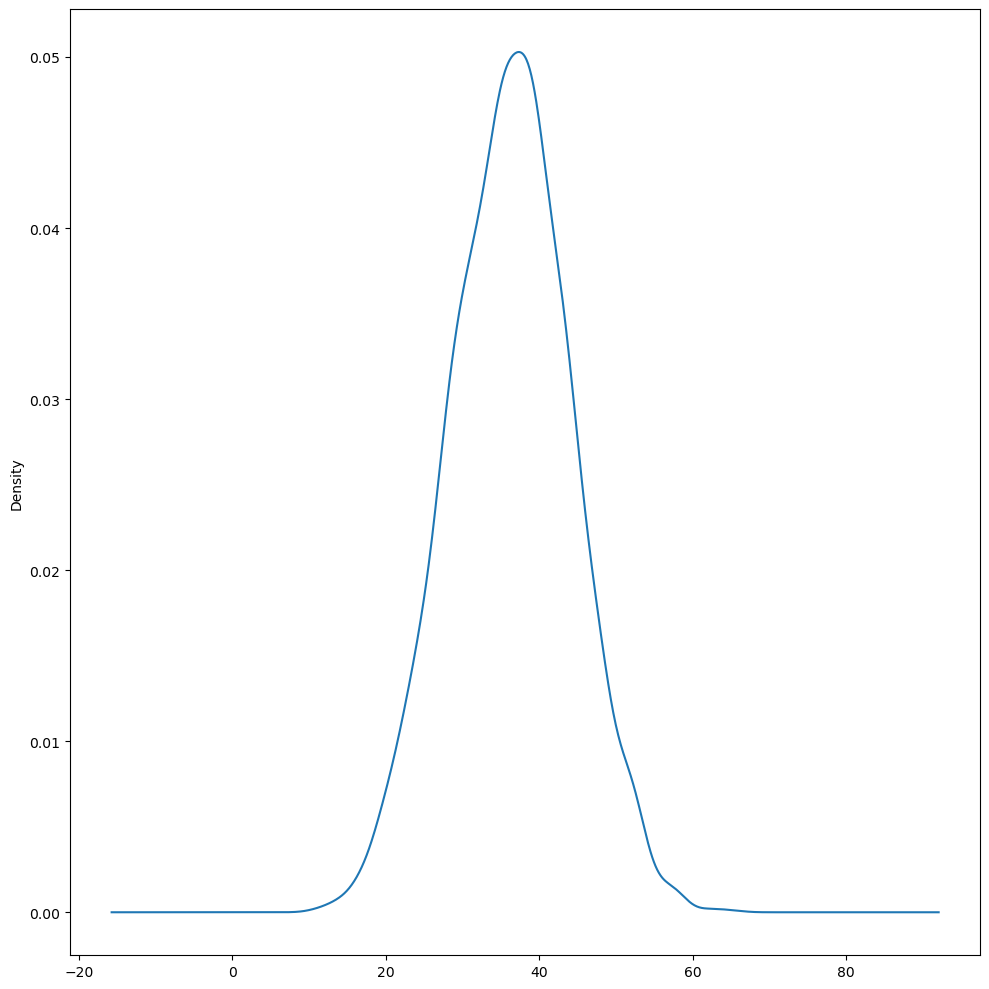

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
for i, col in enumerate(gaussian_cols):
  df[col].plot(kind = 'density', ax = axes, subplots = True, sharex = False) # If i have other columns subplots and sharex allow to show them in other axis
plt.tight_layout()
plt.show()

In [151]:
gaussian_data = df[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [152]:
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]
basic_info_gaussian

PctPublicCoverage
mean          36.252642
std            7.841741
min           11.200000
max           65.100000

In [153]:
gaussian_data[:5]

PctPublicCoverage
0               32.9
1               31.1
2               42.1
3               45.3
4               44.0

In [154]:
print('Highest Allowed', basic_info_gaussian["PctPublicCoverage"]["mean"] + 3 * basic_info_gaussian["PctPublicCoverage"]["std"])
print('Lowest Allowed', basic_info_gaussian["PctPublicCoverage"]["mean"] - 3 * basic_info_gaussian["PctPublicCoverage"]["std"])

Highest Allowed 59.777864755203105
Lowest Allowed 12.727419130586192


# Now I define Z-Score above and below, so +3 which is (59.77) and -3 which is (12.72)

In [155]:
df[(df['PctPublicCoverage'] > 59.777864755203105) | (df['PctPublicCoverage'] < 12.727419130586192)]

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
176          25.0                10             134.3          359.0   
209         862.0               283             136.5          364.9   
1486       1067.0               358             142.9          444.5   
2713          8.0                 3             203.3          201.3   
2740        129.0                54             126.1          332.0   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
176       27627        4596            24.2     0.000000       42.6   
209      122641      375629             3.9   449.912014       35.3   
1486      51907      118891            10.9    84.110656       65.3   
2713      68387        5702             9.9     0.000000       36.8   
2740      32533       20152            22.8     0.000000       54.8   

      MedianAgeMale  ...  state_ South Dakota  state_ Tennessee  state_ Texas  \
176            44.0  ...                  0.0               0.0           0.0   
209            34.9  ...                  0.0               0.0           0.0   
1486           64.7  ...                  0.0               0.0           0.0   
2713           38.8  ...                  0.0               0.0           0.0   
2740           54.8  ...                  0.0               0.0           0.0   

      state_ Utah  state_ Vermont  state_ Virginia  state_ Washington  \
176           0.0             0.0              0.0                0.0   
209           0.0             0.0              1.0                0.0   
1486          0.0             0.0              0.0                0.0   
2713          0.0             0.0              0.0                0.0   
2740          0.0             0.0              0.0                0.0   

      state_ West Virginia  state_ Wisconsin  state_ Wyoming  
176                    0.0               0.0             0.0  
209                    0.0               0.0             0.0  
1486                   0.0               0.0             0.0  
2713                   0.0               0.0             0.0  
2740                   0.0               0.0             0.0  

[5 rows x 1904 columns]

# So I have five rows wiht outliers

# Now I write function that will define outliers and extract columns without outliers

In [156]:
def deal_with_outliers(df, col, basic_info):
  highest_allowed = basic_info[col]["mean"] + 3 * basic_info[col]["std"]
  lowest_allowed = basic_info[col]["mean"] - 3 * basic_info[col]["std"]

  df = df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]
  return df

cols_have_outliers = []
for col in gaussian_cols:
  df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
  shape = df.shape
  if shape[0] > 0:
    cols_have_outliers.append(col)
print(cols_have_outliers)

['PctPublicCoverage']


In [157]:
df

PctPublicCoverage
176                62.7
209                11.8
1486               65.1
2713               11.2
2740               62.2

# Here I gonna remove categorical columns with less than ten unique values

In [158]:
cols_to_remove = []
for col in df_preprocessed.columns:
    if df_preprocessed[col].nunique() < 10:
        cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness = df_preprocessed.drop(cols_to_remove, axis=1)

1870


# Skewed distribution mean that columns are shifted positively or negatively

In [159]:
def identify_skewed_cols(df, cols):
  skewed_cols = []
  for col in cols:
    skew = df[col].skew()
    if skew > 1 or skew < -1:
      skewed_cols.append(col)
  return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns)
len(skewed_cols)

16

In [160]:
skewed_data = data_for_skewness[skewed_cols]

# Now I plot my all skewed columns, there are sixteen and we can see that all of them are skewed positively and negatively

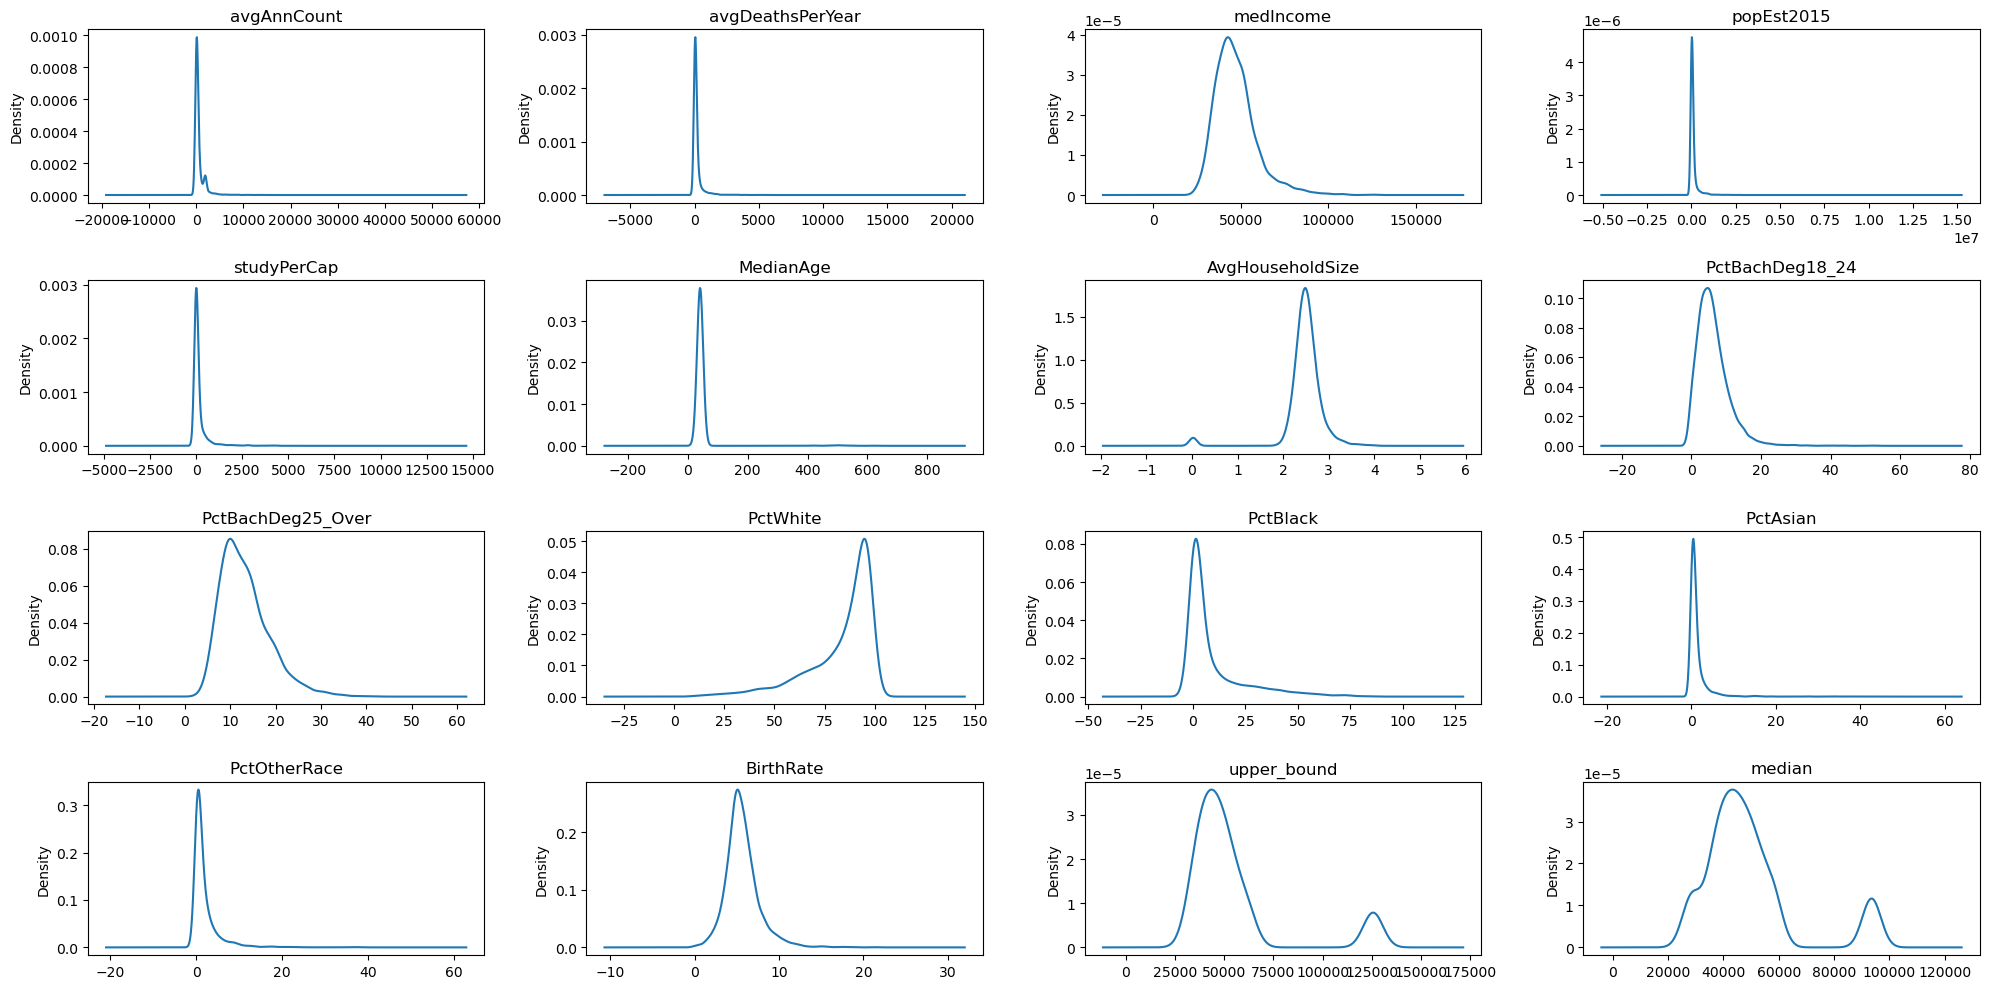

In [161]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 10))

for i, col in enumerate(skewed_cols):
  axes[i // 4, i % 4].set_title(col)
  skewed_data[col].plot(kind = 'density', ax = axes[i // 4, i % 4], subplots = True, sharex = False)

plt.tight_layout()
plt.show()

# I plot also box plot to see outiers

In [162]:
def box_plot(df, col):
  fig = go.Figure(data = [go.Box(y = df_preprocessed[col], boxpoints = 'outliers', jitter = 0.3, pointpos = -1.8)])
  fig.update_layout(
      title = 'Boxplot of ' + col,
      yaxis_title = col,
      width = 500,
      height = 500)
  fig.show()

for col in skewed_cols:
  box_plot(df_preprocessed, col)

# In this function we first define quantile one and three range, then take difference between them. Next we define lower and upper limit with use of STD

In [163]:
percentile25 = df_preprocessed['studyPerCap'].quantile(0.25)
percentile75 = df_preprocessed['studyPerCap'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper Limit", upper_limit)
print("Lower Limit", lower_limit)

df_preprocessed[(df_preprocessed['studyPerCap'] > upper_limit) | (df_preprocessed['studyPerCap'] < lower_limit)]

Upper Limit 209.1269406875
Lower Limit -125.4761644125


avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
3      427.000000               202             194.8     430.400000   
9     4025.000000              1380             177.8     510.900000   
11     740.000000               269             172.7     499.300000   
14    2265.000000               901             171.0     440.700000   
...           ...               ...               ...            ...   
3038  1962.667684               138             153.7     453.549422   
3039  1962.667684                 9             208.3     453.549422   
3041  1962.667684                48             146.4     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0         61898      260131            11.2   499.748204       39.3   
3         44243       75882            17.1   342.637253       42.8   
9         60397      843954            13.1   427.748432       35.8   
11        51395      121846            15.7   837.122269       41.0   
14        50083      490945            16.3   462.373586       37.2   
...         ...         ...             ...          ...        ...   
3038      49246      118053            19.4   660.720185       28.8   
3039      49256        2968            10.5   673.854447       45.2   
3041      49508       29029            13.0   723.414516       32.2   
3043      48609       37118            18.8   377.175494       30.4   
3044      51144       34536            15.0  1968.959926       30.9   

      MedianAgeMale  ...  state_ South Dakota  state_ Tennessee  state_ Texas  \
0              36.9  ...                  0.0               0.0           0.0   
3              42.2  ...                  0.0               0.0           0.0   
9              34.7  ...                  0.0               0.0           0.0   
11             40.0  ...                  0.0               0.0           0.0   
14             35.7  ...                  0.0               0.0           0.0   
...             ...  ...                  ...               ...           ...   
3038           28.0  ...                  0.0               0.0           0.0   
3039           45.2  ...                  0.0               0.0           0.0   
3041           31.0  ...                  0.0               0.0           0.0   
3043           29.3  ...                  0.0               0.0           0.0   
3044           30.5  ...                  0.0               0.0           0.0   

      state_ Utah  state_ Vermont  state_ Virginia  state_ Washington  \
0             0.0             0.0              0.0                1.0   
3             0.0             0.0              0.0                1.0   
9             0.0             0.0              0.0                1.0   
11            0.0             0.0              0.0                1.0   
14            0.0             0.0              0.0                1.0   
...           ...             ...              ...                ...   
3038          0.0             0.0              0.0                0.0   
3039          0.0             0.0              0.0                0.0   
3041          0.0             0.0              0.0                0.0   
3043          0.0             0.0              0.0                0.0   
3044          0.0             0.0              0.0                0.0   

      state_ West Virginia  state_ Wisconsin  state_ Wyoming  
0                      0.0               0.0             0.0  
3                      0.0               0.0             0.0  
9                      0.0               0.0             0.0  
11                     0.0               0.0             0.0  
14                     0.0               0.0             0.0  
...                    ...               ...             ...

# Now I write a function with technics above, which gonna iterate through all columns and apply on them that function which give me columns with outliers

In [164]:
def deal_with_outliers_with_iqr(df_preprocessed, col):
  percentile25 = df_preprocessed[col].quantile(0.25)
  percentile75 = df_preprocessed[col].quantile(0.75)
  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  outliers = df[(df_preprocessed[col] > upper_limit) | (df_preprocessed[col] < lower_limit)]
  return outliers

cols_have_outliers_skewed = []
for col in skewed_cols:
  outliers = deal_with_outliers_with_iqr(df_preprocessed, col)
  shape = outliers.shape

  if shape[0] > 0:
    cols_have_outliers_skewed.append(col)

print(cols_have_outliers_skewed)

['avgDeathsPerYear', 'medIncome', 'popEst2015', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctWhite', 'PctAsian', 'PctOtherRace', 'BirthRate', 'upper_bound', 'median']


# We can use Trimming to detect and remove outliers

In [165]:
#for col in cols_have_outliers:
  #highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
  #lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]

 # trimmed_data = df[(df[col] < highest_allowed) & (df[col] > lowest_allowed)]
#trimmed_data

# This tehnic relace outliers with max allowed and min allowed

In [166]:
#for col in cols_have_outliers:
  #highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
  #lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]

  #capped_data = df.copy()
  #capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
  #capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed
#capped_data

# I gonna use Capping method, because I don't wanna lose so many informations,it gonna update greater and lower than limit with upper and lower limit

In [167]:
def capping(df_preprocessed, col):
  percentile25 = df_preprocessed[col].quantile(0.25)
  percentile75 = df_preprocessed[col].quantile(0.75)

  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  df_preprocessed.loc[df_preprocessed[col] > upper_limit, col] = upper_limit
  df_preprocessed.loc[df_preprocessed[col] < lower_limit, col] = lower_limit
  return df_preprocessed

for col in cols_have_outliers_skewed:
  capped_data = capping(df_preprocessed, col)
capped_data.shape

(3047, 1904)

# When I plot my data on Boxplot I can see, that there are no outliers

In [168]:
for cols in cols_have_outliers_skewed:
  box_plot(capped_data, col)

In [169]:
capped_data.to_csv('capped_data.csv', index = False)